<a href="https://colab.research.google.com/github/Suriya0404/Deep-Learning/blob/master/BUS_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the data.

Mount the Google drive.

In [7]:
from google.colab import drive
import pandas as pd

In [3]:
drive.mount("/content/BUS")

Mounted at /content/BUS


In [4]:
! pwd

/content


In [8]:
! ls /content/BUS/MyDrive/BUS/

DatasetB.csv  original.zip


Read the classification file

In [13]:
dataB = pd.read_csv('/content/BUS/MyDrive/BUS/DatasetB.csv')

In [25]:
dataB[['Image', 'Type', 'Diagnosis']]

,Image,Type,Diagnosis
0,1,Benign,CYST
1,2,Benign,CYST
2,3,Benign,CYST
3,4,Benign,CYST
4,5,Benign,CYST
...,...,...,...
158,306,Malignant,IDC
159,307,Malignant,IDC
160,308,Malignant,IDC
161,309,Malignant,IDC


In [15]:
import zipfile
with zipfile.ZipFile('/content/BUS/MyDrive/BUS/original.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/BUS/MyDrive/BUS/original')

In [21]:
!ls /content/BUS/MyDrive/BUS/original/original/

000001.png  000029.png	000057.png  000085.png	000113.png  000141.png
000002.png  000030.png	000058.png  000086.png	000114.png  000142.png
000003.png  000031.png	000059.png  000087.png	000115.png  000143.png
000004.png  000032.png	000060.png  000088.png	000116.png  000144.png
000005.png  000033.png	000061.png  000089.png	000117.png  000145.png
000006.png  000034.png	000062.png  000090.png	000118.png  000146.png
000007.png  000035.png	000063.png  000091.png	000119.png  000147.png
000008.png  000036.png	000064.png  000092.png	000120.png  000295.png
000009.png  000037.png	000065.png  000093.png	000121.png  000296.png
000010.png  000038.png	000066.png  000094.png	000122.png  000297.png
000011.png  000039.png	000067.png  000095.png	000123.png  000298.png
000012.png  000040.png	000068.png  000096.png	000124.png  000299.png
000013.png  000041.png	000069.png  000097.png	000125.png  000300.png
000014.png  000042.png	000070.png  000098.png	000126.png  000301.png
000015.png  000043.png	000071.png 

Create test and train directories and move the content to the directories.

# Move the data to test and train directories

In [87]:
import shutil
import numpy as np

# move the files to the below folders.
# data/train/Malignant/
# data/train/Benign/
# data/test/Malignant/
# data/test/Benign/

for img in dataB[dataB['Type'] == 'Malignant']['Image']:
  try:
    file_name = str(img).rjust(6, '0') + '.png'

    if np.random.choice(10, 1)[0] < 2:
      shutil.move("/content/BUS/MyDrive/BUS/original/original/" + file_name, "/content/BUS/MyDrive/BUS/data/test/Malignant/" + file_name)
    else:
      shutil.move("/content/BUS/MyDrive/BUS/original/original/" + file_name, "/content/BUS/MyDrive/BUS/data/train/Malignant/" + file_name)
  except:
    print('Could not move the Malignant file ' + file_name)


for img in dataB[dataB['Type'] == 'Benign']['Image']:
  try:
    file_name = str(img).rjust(6, '0') + '.png'

    if np.random.choice(10, 1)[0] < 2:
      shutil.move("/content/BUS/MyDrive/BUS/original/original/" + file_name, "/content/BUS/MyDrive/BUS/data/test/Benign/" + file_name)
    else:
      shutil.move("/content/BUS/MyDrive/BUS/original/original/" + file_name, "/content/BUS/MyDrive/BUS/data/train/Benign/" + file_name)
  except:
    print('Could not move the Benign file ' + file_name)

In [92]:
! ls /content/BUS/MyDrive/BUS/data/train/Benign

000001.png  000032.png	000060.png  000078.png	000099.png  000117.png
000002.png  000033.png	000061.png  000079.png	000100.png  000118.png
000005.png  000034.png	000062.png  000082.png	000101.png  000119.png
000006.png  000035.png	000063.png  000083.png	000104.png  000120.png
000007.png  000036.png	000064.png  000084.png	000105.png  000121.png
000008.png  000037.png	000065.png  000086.png	000106.png  000122.png
000009.png  000038.png	000066.png  000087.png	000107.png  000123.png
000010.png  000039.png	000067.png  000088.png	000108.png  000124.png
000012.png  000040.png	000069.png  000089.png	000109.png  000125.png
000016.png  000042.png	000071.png  000090.png	000110.png  000127.png
000017.png  000051.png	000072.png  000093.png	000111.png  000128.png
000019.png  000052.png	000073.png  000094.png	000112.png  000129.png
000020.png  000056.png	000074.png  000095.png	000113.png  000130.png
000021.png  000058.png	000075.png  000096.png	000114.png  000131.png
000026.png  000059.png	000077.png 

# Import the packages

In [26]:
import os
from PIL import Image
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [97]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchvision.utils import make_grid

In [42]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

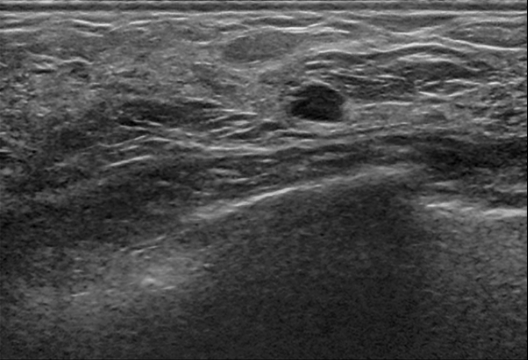

In [148]:
img1 = Image.open('/content/BUS/MyDrive/BUS/data/train/Benign/000001.png').convert('RGB')
display(img1)


In [149]:
img1.size

(528, 360)

# Transform the input data

In [150]:
transform = transforms.Compose([
    transforms.ToTensor()
])

im = transform(img1)
print(type(im))
print(im.shape)

<class 'torch.Tensor'>
torch.Size([3, 360, 528])


In [57]:
from torchvision import models, datasets, transforms
import torch
dlab = models.segmentation.deeplabv3_resnet101(pretrained=1).eval()

In [177]:
train_transform = transforms.Compose([
                                     transforms.Resize(size=256),
                                     transforms.CenterCrop(size=224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                                          std=[0.229, 0.224, 0.225])
                                     

])

im = train_transform(img1)
print(type(im))
print(im.shape)
display(im)

<class 'torch.Tensor'>
torch.Size([3, 224, 224])


tensor([[[ 0.3138,  0.2111,  0.2111,  ..., -0.6623, -0.6794, -0.7308],
         [ 1.3584,  1.1872,  0.9132,  ..., -0.6794, -0.7822, -0.8678],
         [ 0.7591,  0.7077,  0.6563,  ..., -0.6623, -0.8335, -0.9705],
         ...,
         [-0.9877, -1.1247, -1.2445,  ..., -1.6384, -1.5528, -1.5014],
         [-1.2445, -1.3130, -1.4329,  ..., -1.4843, -1.5185, -1.5528],
         [-1.5014, -1.5014, -1.5014,  ..., -1.4500, -1.4672, -1.4843]],

        [[ 0.4503,  0.3452,  0.3452,  ..., -0.5476, -0.5651, -0.6176],
         [ 1.5182,  1.3431,  1.0630,  ..., -0.5651, -0.6702, -0.7577],
         [ 0.9055,  0.8529,  0.8004,  ..., -0.5476, -0.7227, -0.8627],
         ...,
         [-0.8803, -1.0203, -1.1429,  ..., -1.5455, -1.4580, -1.4055],
         [-1.1429, -1.2129, -1.3354,  ..., -1.3880, -1.4230, -1.4580],
         [-1.4055, -1.4055, -1.4055,  ..., -1.3529, -1.3704, -1.3880]],

        [[ 0.6705,  0.5659,  0.5659,  ..., -0.3230, -0.3404, -0.3927],
         [ 1.7337,  1.5594,  1.2805,  ..., -0

In [178]:
train_dataset = datasets.ImageFolder('/content/BUS/MyDrive/BUS/data/train',
                                     transform=train_transform)

test_dataset = datasets.ImageFolder('/content/BUS/MyDrive/BUS/data/test',
                                     transform=train_transform)

In [179]:
batch_size = 10

train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset,
                                           batch_size=batch_size)

# VGG16 Pre-trained Model

In [180]:
model = models.vgg16(pretrained=True)

In [181]:
# Freeze VGG weights:
for param in model.parameters():
  param.requires_grad = False

In [182]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [183]:
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [184]:
n_features = model.classifier[0].in_features

In [185]:
model.classifier = nn.Linear(n_features, 2)

In [186]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [187]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cpu


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

# Batch Gradient Descent

In [188]:
# Loss and optimizer:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [199]:
from datetime import datetime

def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)
  train_accuracy = np.zeros(epochs)
  test_accuracy = np.zeros(epochs)

  for it in range(epochs):
    t0 = datetime.now()

    print('training')
    train_loss = []
    trn_corr = 0
    cnt = 0
    for inputs, targets in train_loader:
      cnt += 1
      # print('assign device')
      inputs, targets = inputs.to(device), targets.to(device)

      # print('Zero gradient')
      optimizer.zero_grad()

      # print('Shape:' + str(inputs.shape))
      outputs = model(inputs)
      loss = criterion(outputs, targets)

      predicted = torch.max(outputs.data, 1)[1]
      batch_corr = (predicted == targets).sum()
      trn_corr += batch_corr

      # print('Backpropogation and optimization')
      loss.backward()
      optimizer.step()

      train_loss.append(loss.item())

    train_loss_mean = np.mean(train_loss)
    train_accuracy[it] = trn_corr / cnt

    print('Test')
    test_loss = []
    test_corr = 0
    cnt = 0

    for inputs, targets in test_loader:
      cnt += 1
      inputs, targets = inputs.to(device), targets.to(device)
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      
      predicted = torch.max(outputs.data, 1)[1]
      batch_corr = (predicted == targets).sum()
      test_corr += batch_corr

      test_loss.append(loss.item())

    test_loss_mean = np.mean(test_loss)
    test_accuracy[it] = test_corr/ cnt

    train_losses[it] = train_loss_mean
    test_losses[it] = train_loss_mean



    dt = datetime.now() - t0

    print(f'Epoch {it + 1} /{epochs}, Train loss: {train_loss_mean:.4f}, \
            Test Loss: {test_loss_mean:.4f}, \
            Train accuracy: {train_accuracy[it]}, Test accuracy: {test_accuracy[it]}, \
            Duration: {dt} ')

  return train_losses, test_losses

In [200]:
train_losses, test_losses = batch_gd(model,
                                     criterion,
                                     optimizer,
                                     train_loader,
                                     test_loader,
                                     epochs=10)

training
Test
Epoch 1 /10, Train loss: 0.0017,             Test Loss: 0.3088,             Train accuracy: 9.571428298950195, Test accuracy: 8.333333015441895,             Duration: 0:01:25.071759 
training
Test
Epoch 2 /10, Train loss: 0.0016,             Test Loss: 0.3052,             Train accuracy: 9.571428298950195, Test accuracy: 8.333333015441895,             Duration: 0:01:25.078462 
training
Test
Epoch 3 /10, Train loss: 0.0016,             Test Loss: 0.2994,             Train accuracy: 9.571428298950195, Test accuracy: 8.333333015441895,             Duration: 0:01:25.396754 
training
Test
Epoch 4 /10, Train loss: 0.0014,             Test Loss: 0.3018,             Train accuracy: 9.571428298950195, Test accuracy: 8.333333015441895,             Duration: 0:01:24.780860 
training
Test
Epoch 5 /10, Train loss: 0.0013,             Test Loss: 0.3068,             Train accuracy: 9.571428298950195, Test accuracy: 8.333333015441895,             Duration: 0:01:25.045655 
training
Test
E

KeyboardInterrupt: ignored

In [ ]:
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at Epoch')
plt.legend()

In [141]:
plt.plot(train_accuracy, label='Train accuracy')
plt.plot(test_accuracy, label='Test accuracy')
plt.title('Accuracy at the end of each Epoch')
plt.legend()

tensor([1, 1, 0, 0, 1, 1, 0, 1, 0, 0])
tensor([0, 1, 0, 0, 0, 1, 0, 1, 0, 0])
tensor([1, 0, 0, 0, 1, 0, 1, 0, 0, 0])
tensor([1, 0, 0, 0, 0, 0, 0, 1, 0, 0])
tensor([1, 0, 0, 0, 1, 0, 0, 0, 0, 1])
tensor([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])
tensor([0, 1, 0, 1, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 1, 1, 1, 0, 0, 1, 0, 0])
tensor([0, 1, 1, 0, 1, 0, 1, 1, 1, 1])
tensor([1, 0, 1, 1, 0, 1, 0, 0, 0, 1])
tensor([0, 1, 1, 0, 0, 0, 0, 1, 0, 0])
tensor([0, 0, 0, 1, 0, 0, 1, 0, 0, 0])
tensor([0, 1, 0, 0, 0, 1, 1, 1, 0, 0])
tensor([0, 0, 1, 0])


In [201]:
! pip install pytorch_pretrained_vit

  Created wheel for pytorch-pretrained-vit: filename=pytorch_pretrained_vit-0.0.7-cp37-none-any.whl size=11132 sha256=d454d45df9ecf6c504821aa5805ba98fb309888fa8ded254f788d9f70733ea99
  Stored in directory: /root/.cache/pip/wheels/b8/e9/a9/bf3f411475804be42190a13be925e65a63fdf30e1a469a9fe8
Successfully built pytorch-pretrained-vit


In [202]:
import json
from PIL import Image
import torch
from torchvision import transforms

# Load ViT
from pytorch_pretrained_vit import ViT
model = ViT('B_16_imagenet1k', pretrained=True)
model.eval()



Downloading: "https://github.com/lukemelas/PyTorch-Pretrained-ViT/releases/download/0.0.2/B_16_imagenet1k.pth" to /root/.cache/torch/hub/checkpoints/B_16_imagenet1k.pth



Loaded pretrained weights.


ViT(
  (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (positional_embedding): PositionalEmbedding1D()
  (transformer): Transformer(
    (blocks): ModuleList(
      (0): Block(
        (attn): MultiHeadedSelfAttention(
          (proj_q): Linear(in_features=768, out_features=768, bias=True)
          (proj_k): Linear(in_features=768, out_features=768, bias=True)
          (proj_v): Linear(in_features=768, out_features=768, bias=True)
          (drop): Dropout(p=0.1, inplace=False)
        )
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (pwff): PositionWiseFeedForward(
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
        )
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (drop): Dropout(p=0.1, inplace=False)
      )
      (1): Block(
 

In [203]:
# Freeze VGG weights:
for param in model.parameters():
  param.requires_grad = False

In [209]:
n_features = model.fc.in_features

In [210]:
model.classifier = nn.Linear(n_features, 2)

In [216]:
model

ViT(
  (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (positional_embedding): PositionalEmbedding1D()
  (transformer): Transformer(
    (blocks): ModuleList(
      (0): Block(
        (attn): MultiHeadedSelfAttention(
          (proj_q): Linear(in_features=768, out_features=768, bias=True)
          (proj_k): Linear(in_features=768, out_features=768, bias=True)
          (proj_v): Linear(in_features=768, out_features=768, bias=True)
          (drop): Dropout(p=0.1, inplace=False)
        )
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (pwff): PositionWiseFeedForward(
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
        )
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (drop): Dropout(p=0.1, inplace=False)
      )
      (1): Block(
 

In [211]:
# Load image
# NOTE: Assumes an image `img.jpg` exists in the current directory
itransform = transforms.Compose([
    transforms.Resize((384, 384)), 
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
])

In [212]:
train_dataset = datasets.ImageFolder('/content/BUS/MyDrive/BUS/data/train',
                                     transform=itransform)

test_dataset = datasets.ImageFolder('/content/BUS/MyDrive/BUS/data/test',
                                     transform=itransform)

In [213]:
batch_size = 10

train_loader = torch.utils.data.DataLoader(train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=batch_size)

In [214]:
# Loss and optimizer:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [215]:
from datetime import datetime

def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)
  train_accuracy = np.zeros(epochs)
  test_accuracy = np.zeros(epochs)

  for it in range(epochs):
    t0 = datetime.now()

    # print('training')
    train_loss = []
    trn_corr = 0
    cnt = 0
    for inputs, targets in train_loader:
      cnt += 1
      # print('assign device')
      inputs, targets = inputs.to(device), targets.to(device)

      # print('Zero gradient')
      optimizer.zero_grad()

      # print('Shape:' + str(inputs.shape))
      outputs = model(inputs)
      loss = criterion(outputs, targets)

      predicted = torch.max(outputs.data, 1)[1]
      batch_corr = (predicted == targets).sum()
      trn_corr += batch_corr

      # print('Backpropogation and optimization')
      loss.backward()
      optimizer.step()

      train_loss.append(loss.item())

    train_loss_mean = np.mean(train_loss)
    train_accuracy[it] = trn_corr / cnt

    # print('Test')
    test_loss = []
    test_corr = 0
    cnt = 0

    for inputs, targets in test_loader:
      cnt += 1
      inputs, targets = inputs.to(device), targets.to(device)
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      
      predicted = torch.max(outputs.data, 1)[1]
      batch_corr = (predicted == targets).sum()
      test_corr += batch_corr

      test_loss.append(loss.item())

    test_loss_mean = np.mean(test_loss)
    test_accuracy[it] = test_corr/ cnt

    train_losses[it] = train_loss_mean
    test_losses[it] = train_loss_mean



    dt = datetime.now() - t0

    print(f'Epoch {it + 1} /{epochs}, Train loss: {train_loss_mean:.4f}, \
            Test Loss: {test_loss_mean:.4f}, \
            Train accuracy: {train_accuracy[it]}, Test accuracy: {test_accuracy[it]}, \
            Duration: {dt} ')

  return train_losses, test_losses

In [217]:
train_losses, test_losses = batch_gd(model,
                                     criterion,
                                     optimizer,
                                     train_loader,
                                     test_loader,
                                     epochs=10)

RuntimeError: ignored